## Indicators of I-94 Highway Traffic

In this project we analyize the I-94 interstate highway traffic using exploratory data visualization. The dataset used was generated by John Hogue and can be gotten from [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume). At the end of this project, we would have been able to determine a few indicators of heavy traffic on I-94.

## Metro Interstate Dataset

In [1]:
import pandas as pd
traffic_i94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

traffic_i94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
traffic_i94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
traffic_i94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset has 48,204 rows and 9 columns, and there are no null values. Each row describes traffic and weather data for a specific hour — we have data from 2012-10-02 09:00:00 until 2018-09-30 23:00:00.

A station located approximately midway between Minneapolis and Saint Paul records the traffic data (see the [dataset documentation](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)). For this station, the direction of the route is westbound (i.e., cars moving from east to west). This means that the results of our analysis will be about the westbound traffic in the proximity of the station. In other words, we should avoid generalizing our results for the entire I-94 highway.

## Traffic volume analysis
We start by analysing the traffic volume distribution

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

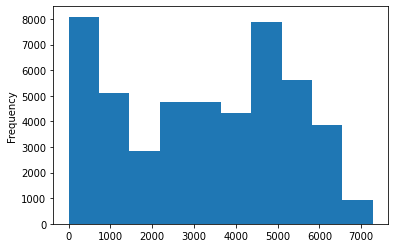

In [5]:
traffic_i94['traffic_volume'].plot.hist()
plt.show()

In [6]:
traffic_i94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Hourly traffic varied from 0 to 7280 cars, with an average of 3380 cars.

25% of the time, the volume of cars was 1193 per hour (probably night time traffic) and another 2r5% of the time traffic volume was higher, about 4 times (4933 cars).

With this observation, we can compare effect of daytime and nighttime on traffic.

## DayTime vs NightTime: traffic volume Analysis

We start by dividing the the data set into day and night:
- Day: 7a.m to 7p.m
- Night: 7p.m to 7a.m

This is not a perfect differentiation of day and night but its a good start.

In [13]:
traffic_i94['date_time'] = pd.to_datetime(traffic_i94['date_time'])

day = traffic_i94.copy()[traffic_i94['date_time'].dt.hour.between(7,18)]
night = traffic_i94.copy()[~(traffic_i94['date_time'].dt.hour.between(7,18))]
print(day.shape)
print(night.shape)

(23877, 9)
(24327, 9)


Now we plot the distribution of traffc volume for each period.

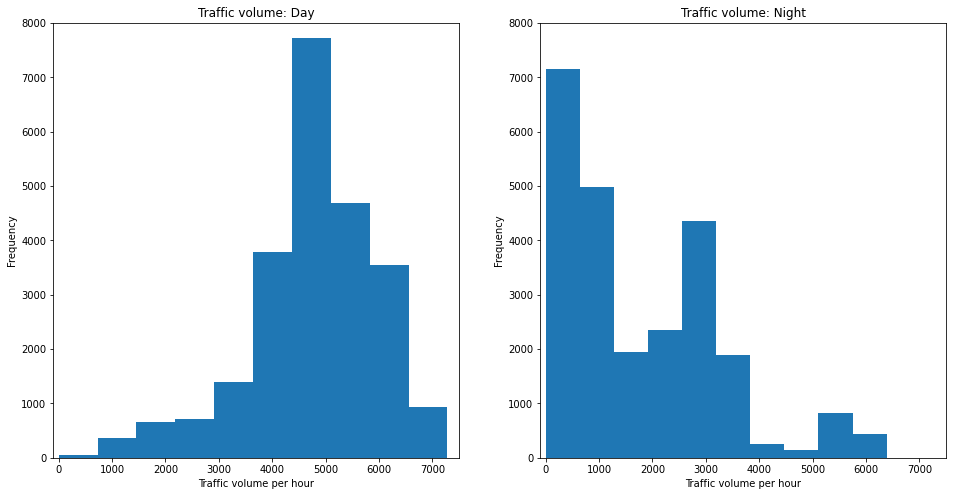

In [14]:
plt.figure(figsize=(16,8))

#dayTime plot
plt.subplot(1,2,1)
day['traffic_volume'].plot.hist()
plt.xlabel('Traffic volume per hour')
plt.ylabel('Frequency')
plt.ylim(0,8000)
plt.xlim(-100,7500)
plt.title('Traffic volume: Day')

#nightTime plot
plt.subplot(1,2,2)
night['traffic_volume'].plot.hist()
plt.xlabel('Traffic volume per hour')
plt.ylabel('Frequency')
plt.ylim(0,8000)
plt.xlim(-100,7500)
plt.title('Traffic volume: Night')

plt.show()

In [15]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [16]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The day time distribution is left skewed, this means that there is high volume of cars passing the station. More than 4252 cars are passing the station 75% of the time.

The night time distribution is right skewed, indiating lighter traffic, with an average of 1785 cars per hour.

Since the aim of this project is to identify heavy traffic indicators, moving forward night time data would be dropped.

## Time Indicators
One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of day.

We're going to look at a few line plots showing how the traffic volume changes according to the following:

- Month
- Day of the week
- Time of day

## Time Indicator: Month

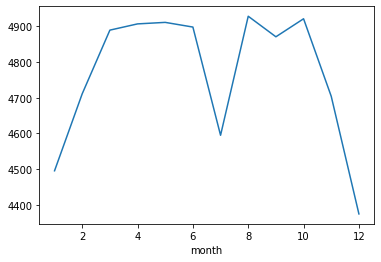

In [17]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.show()

Traffic looks less during winter months (November-February) and more heavy during hotter months (March-October), although there is an see an exception in July.

We'd examine July to get more information.

## Time Indicator: Day of the week

Now, we examine the traffic volume in the month of July by days of the week.

In [18]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

<AxesSubplot:xlabel='dayofweek'>

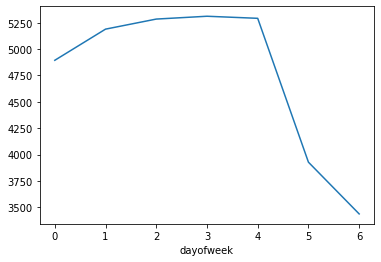

In [19]:
by_dayofweek['traffic_volume'].plot.line()

The traffic volume is heavier on work days (Monday - Friday) and lighter on weekends.

## Time Indicator: Time of day

We now divide the days of the week into business and weekend days, and analyise the hourly traffic volume.

In [20]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


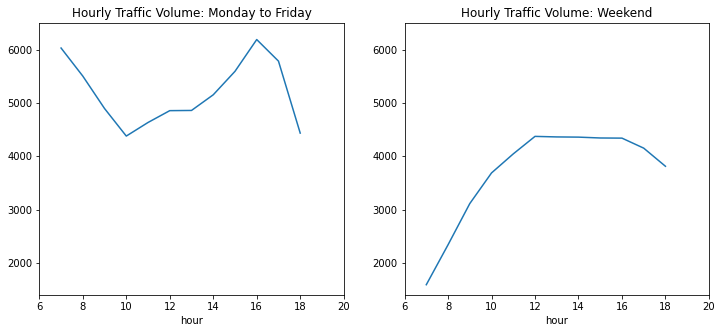

In [30]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1400,6500)
plt.title('Hourly Traffic Volume: Monday to Friday')


plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1400,6500)
plt.title('Hourly Traffic Volume: Weekend')

plt.show()

The traffic volume at each hour of the day is generally higher for business days than weekends. The rush hours for business days are 7 and 16 (7am and 4pm); when workers leave for work and when they return. Rush hours have volumes of over 6000 cars.

Summarizing a few time-related indicators of heavy traffic:

- Traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- Traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.

## Weather factors

Weather is another factor that can affect traffic. The dataset provided a weather columns with numerical values.

We go ahead to find correlation between the traffic volume and those columns.

In [32]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Of all the relevant columns, the temperature column has the strongest correlation (+0.13). Other columns have low correlation with the traffic volume.

We would visualise the strongest correlation on a scatter plot.

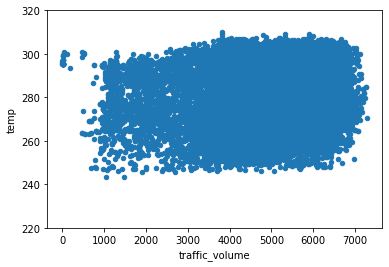

In [38]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(220,320)
plt.show()

We can say that temperature is not a strong indicator of heavy traffic.

Now we look at the categorical weather columns: weather_main and weather_description.

## Weather categories

We start by grouping the dataset by weather_main and weather_description, and look at the traffic volume average.

In [39]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

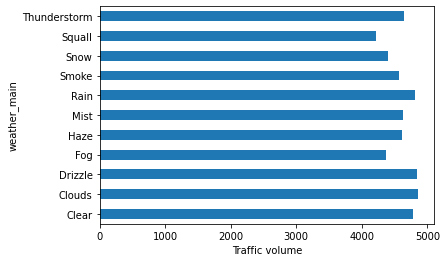

In [44]:
by_weather_main['traffic_volume'].plot.barh()
plt.xlabel('Traffic volume')
plt.show()

There is no significat distinction in traffic volume for the wetaher types, therefore it is difficult to determine a heavy traffic indicator. 
Let's check by weather_description which has more details of the weather.

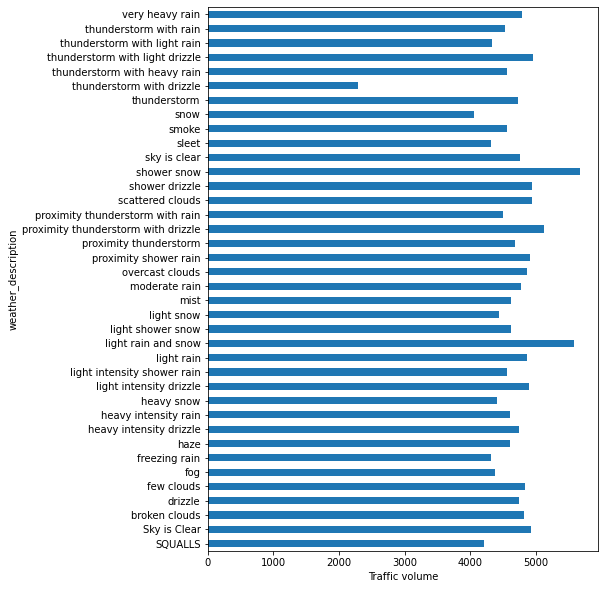

In [47]:
by_weather_description['traffic_volume'].plot.barh(figsize=(7,10))
plt.xlabel('Traffic volume')
plt.show()

There are two significant weather descriptions that have high traffic volume (above 5000 cars):
- shower snow
- light rain and snow.

It is not clear as to why these have high average traffic volumes. One possible reason is they are bad weathers and people tend to take their cars out rather than walking or riding bikes.